## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Checking the number of class in target variable

In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df.shape

(1599, 12)

Dataset is having 1599 no.of rows and 12 no. of columns

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We observed that there are no null values in dataset

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We observe that all features having datatype as float (All are continous independent variable)

# Classifying wine quality in terms of good and bad



In [7]:
df['quality']=df['quality'].replace([7,8],'Good')

In [8]:
df['quality']=df['quality'].replace([3,4,5,6],'Bad')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


In [10]:
df['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

Since our dataset is small and target varible is imbalanced .We need to perform over sampling

# Now using encoder to encode the target variable

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc=LabelEncoder()

In [13]:
df['quality']=enc.fit_transform(df['quality'])

In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [15]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

We can see that out target variable is imbalanced

### Describing the dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# EDA

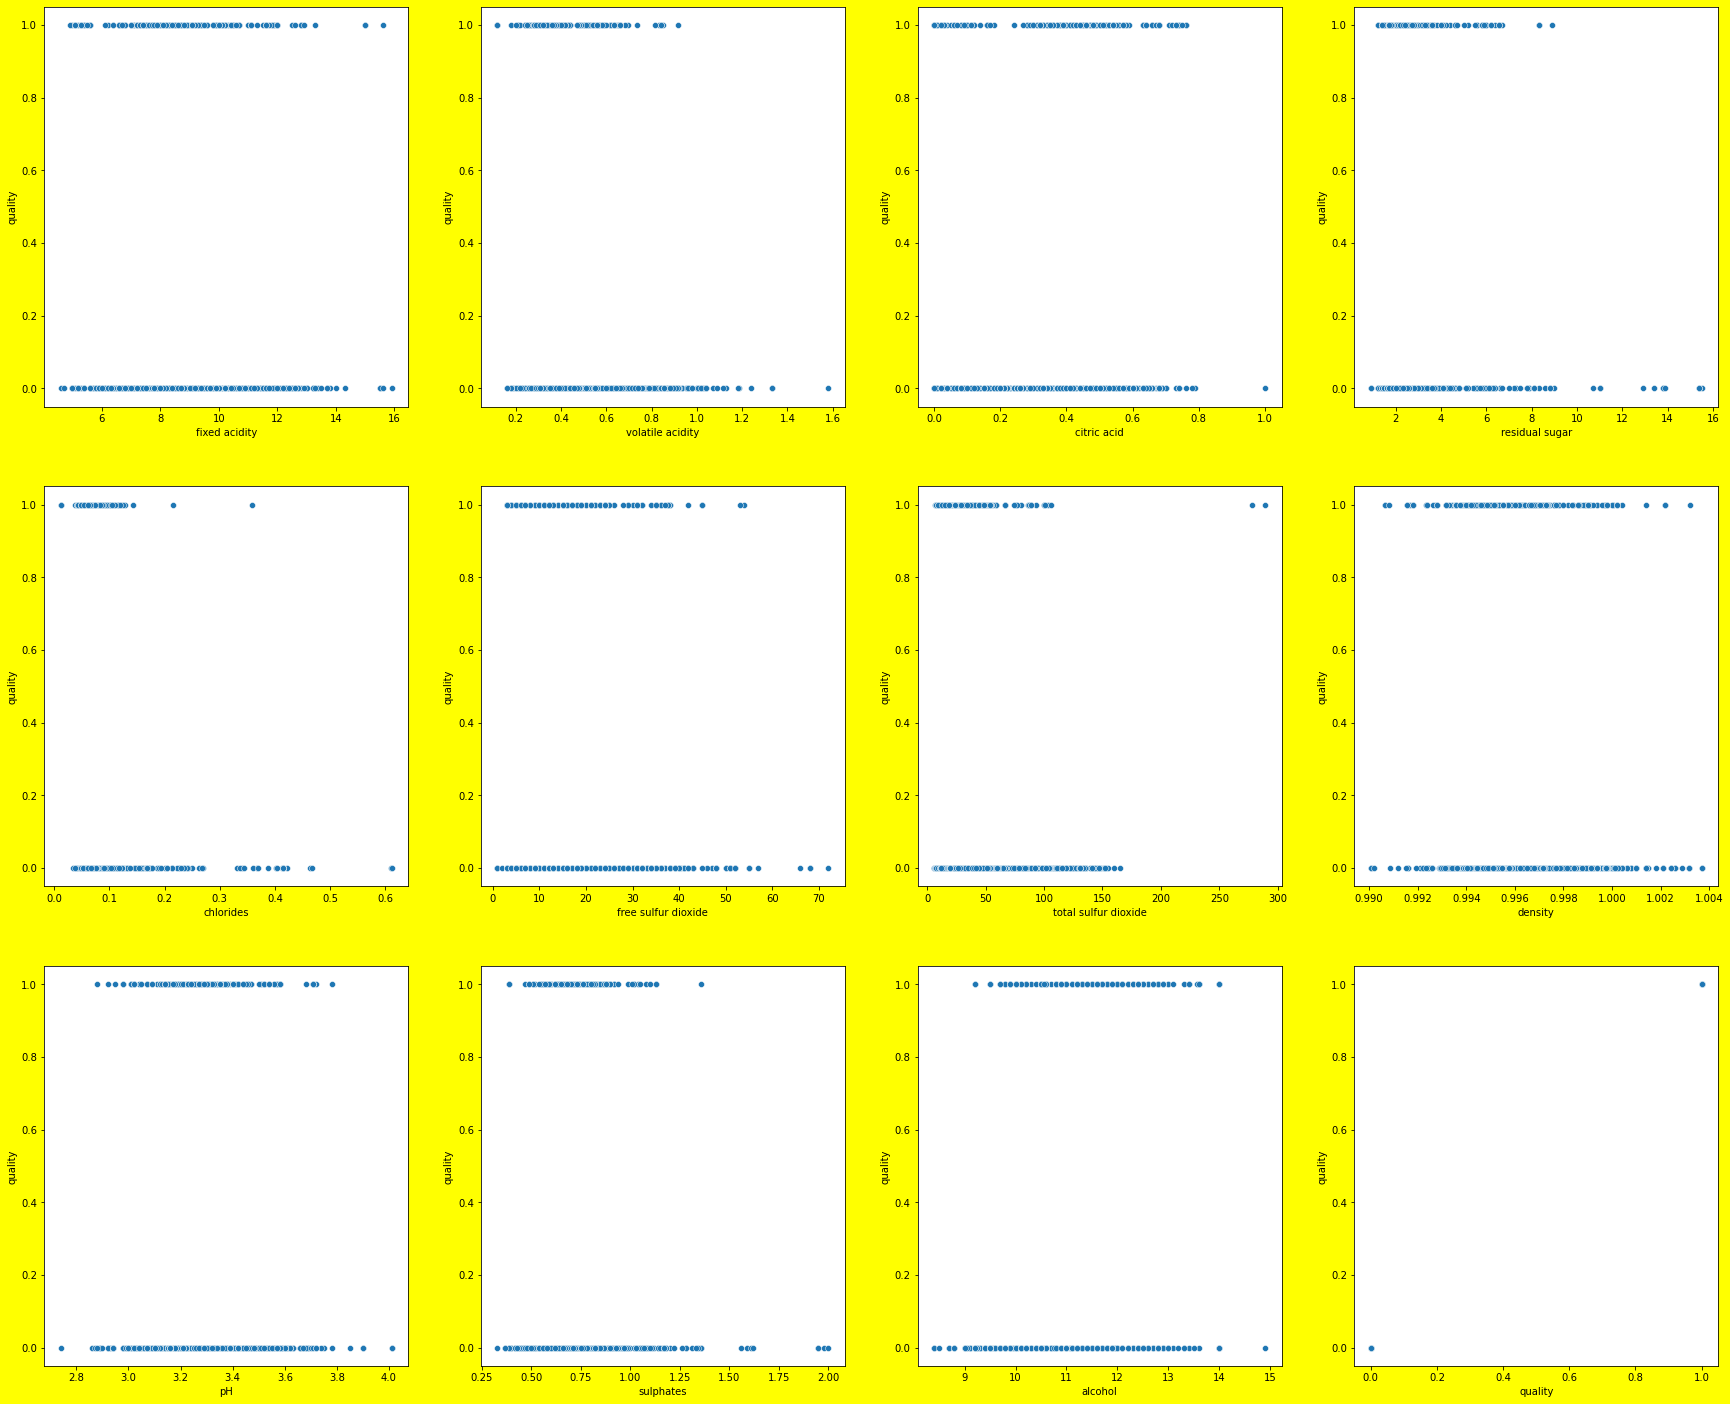

In [17]:
plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(x=column,y="quality",data=df)
    plotnumber=plotnumber+1

plt.show()

# Checking the correaltion with target variable and between features

## Plotting heatmap

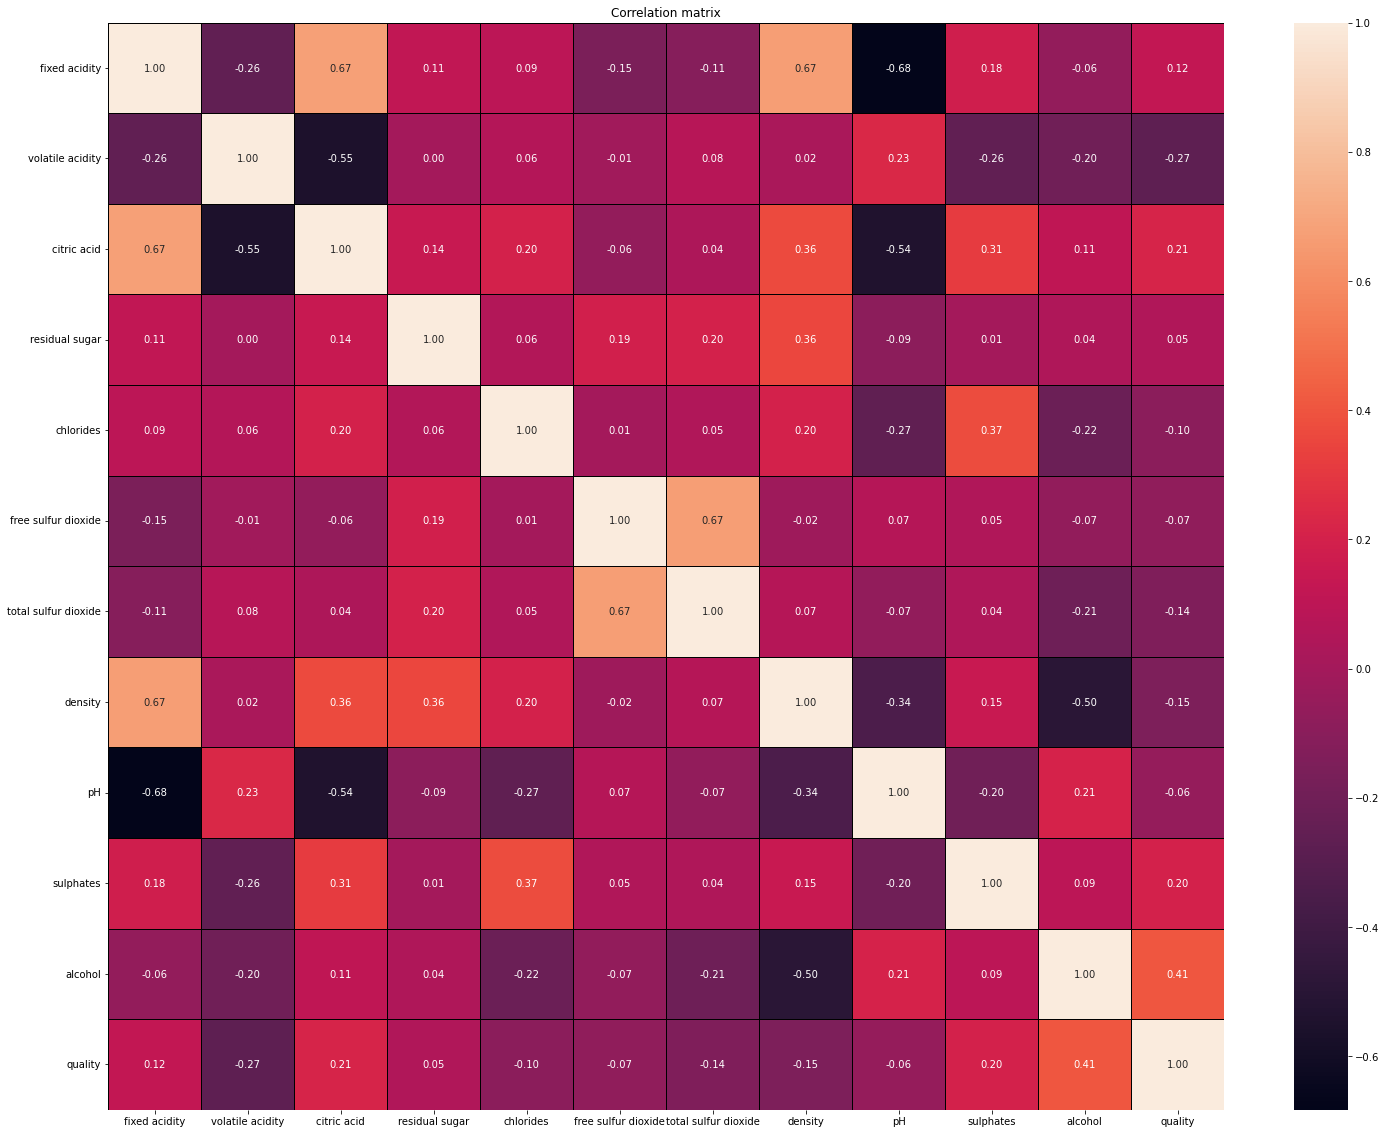

In [18]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

In [19]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

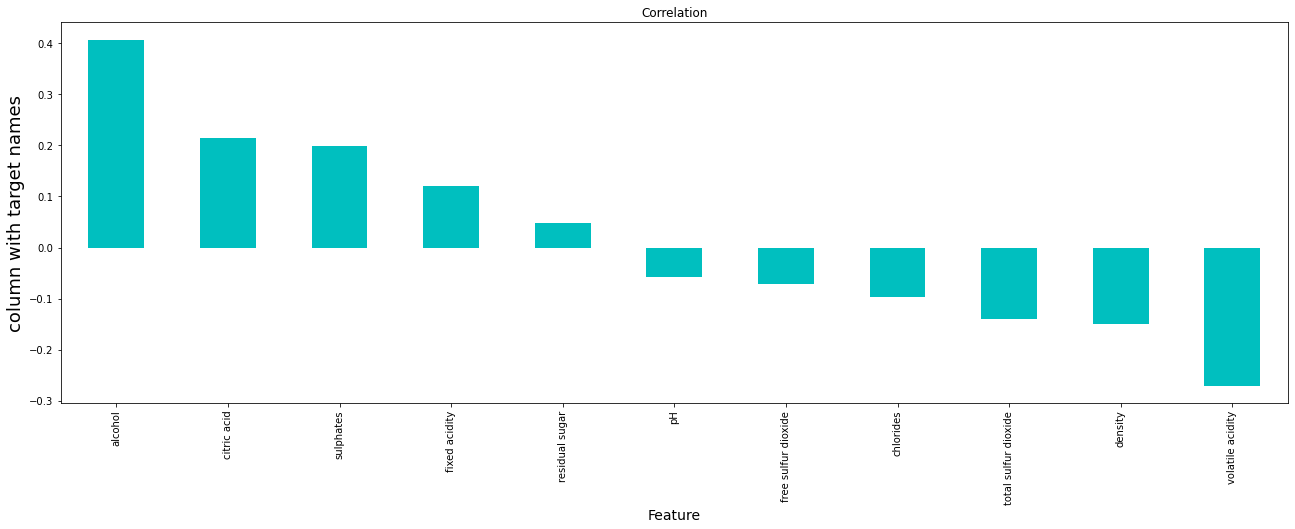

In [20]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()


# Checking the skewness

In [21]:
df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
quality                 2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

From above obsevation except ph and density all columns having skewness 

setting the skewness limit to +/- 0.65.

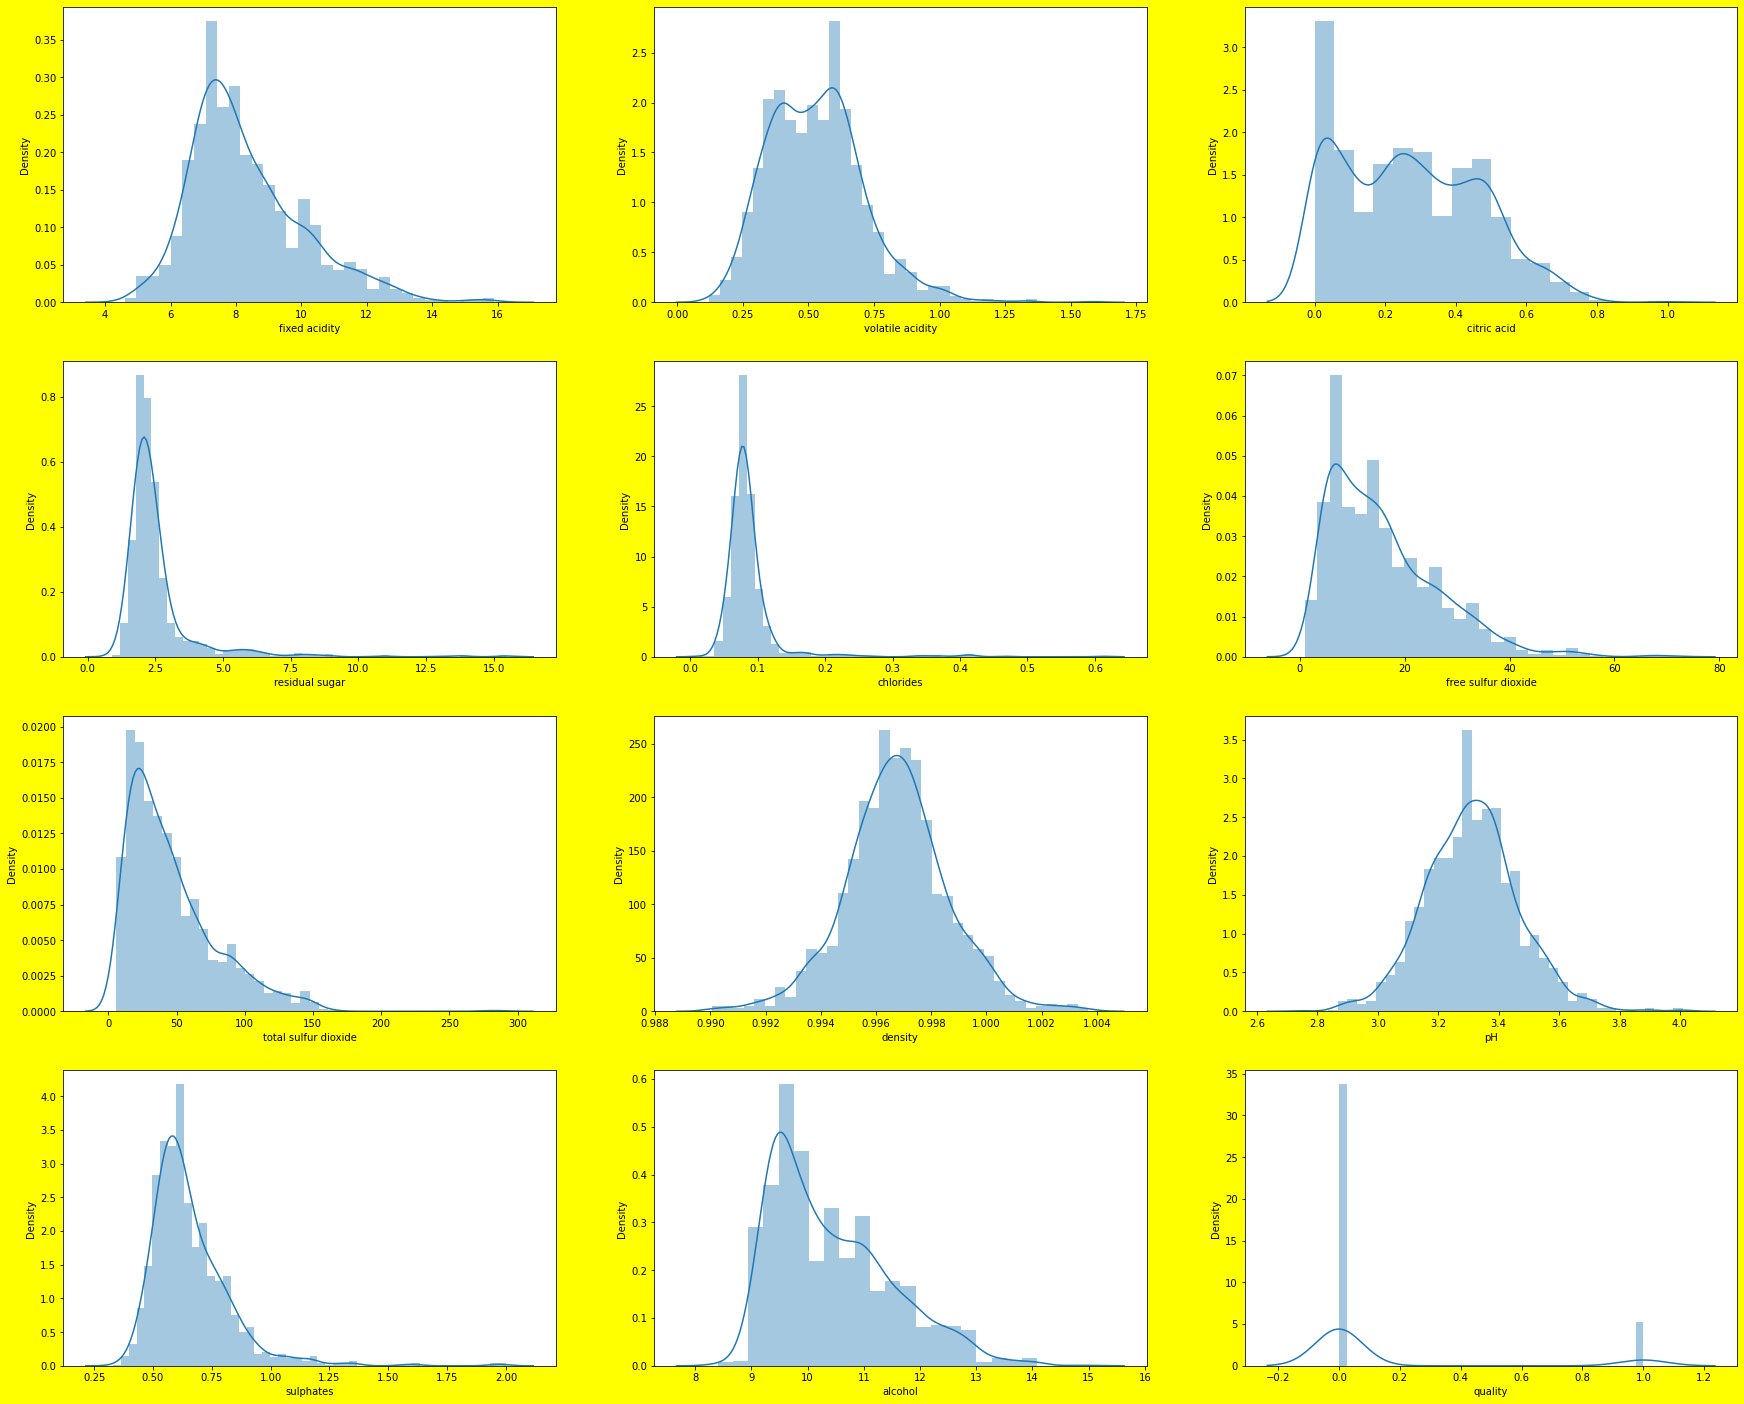

In [22]:
plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
    plotnumber=plotnumber+1

plt.show()

# Checking the outliers 

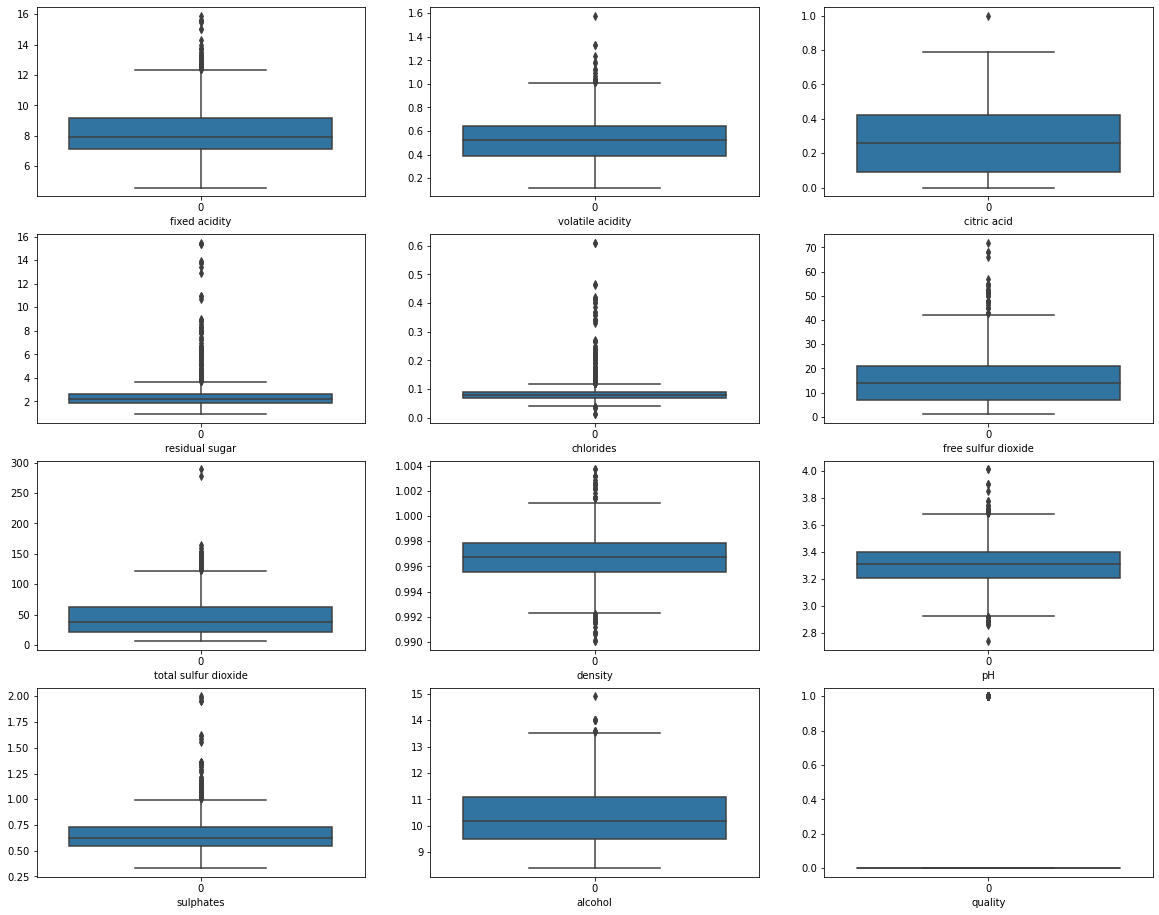

In [23]:
graph=1

plt.figure(figsize=(20,16))

for column in df:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
    graph+=1
plt.show()

From above observations we found that all the columns have outliers in it

# Preprocessing

Dividing label and features from dataset as x and y

In [24]:
x=df.drop(columns=['quality'],axis=1)
y=df['quality']

### Removing Outliers using Z-technique

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.396256
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.396256
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.396256
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.396256
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.396256
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.396256
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.396256


In [26]:
threshold=3  # rule of thumb
#index number
print(np.where(z>3))
len(np.where(z>3)[0])

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

182

We can conclude that there are 182 outliers present in the dataset(z_score lies above the standard deviation 3)

In [27]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (1599, 12)
new dataframe (1458, 12)
total number of rows dropped 141


Hence the total number of rows dropped from the dataset is 141

### Percentage data loss

In [28]:
loss_percent=(1599-1458)/1599*100
loss_percent

8.818011257035648

Percentage loss is less than 10 % .So it is OK

# Feature Selection using Select Percentile Method

In [29]:
from sklearn.feature_selection import SelectPercentile,chi2

In [30]:
spercentile=SelectPercentile(score_func=chi2,percentile=80)

In [31]:
spercentile=spercentile.fit(x,y)

In [32]:
cols=spercentile.get_support(indices=True)

In [33]:
print('Feature index=',cols)

Feature index= [ 0  1  2  3  5  6  9 10]


In [34]:
features=x.columns[cols]   

In [35]:
print('Features=',list(features))

Features= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [36]:
df_scores=pd.DataFrame({'features':x.columns,'Chi2score':spercentile.scores_,'pvalue':spercentile.pvalues_})

In [37]:
df_scores.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,pvalue
6,total sulfur dioxide,724.343506,1.521165e-159
5,free sulfur dioxide,56.696032,5.086609e-14
10,alcohol,28.886089,7.676224e-08
2,citric acid,10.317077,1.318048e-03
0,fixed acidity,8.393096,3.766487e-03
1,volatile acidity,7.113769,7.649412e-03
3,residual sugar,2.856369,9.101271e-02
9,sulphates,2.776190,9.567551e-02
4,chlorides,0.383204,5.358933e-01
8,pH,0.037747,8.459528e-01


In [38]:
x=df[features]

# Handling imbalanced dataset 

Since target variable is imbalanced and size of dataset is small so we will do oversampling

 









### Over sampling using SMOTE


In [39]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=50)

In [42]:

over_smpl=SMOTE(0.75)
x_train_ns,y_train_ns=over_smpl.fit_resample(x_train,y_train)

In [43]:
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({0: 346, 1: 53})


In [44]:
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes after fitCounter({0: 346, 1: 259})


In [45]:
y_train_ns

0      0
1      0
2      0
3      0
4      0
      ..
600    1
601    1
602    1
603    1
604    1
Name: quality, Length: 605, dtype: int32

# Removing skewness using data transforamtion

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
x=power_transform(x,method='yeo-johnson')
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
        -1.24411195e-01, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
         8.54953753e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
         5.40393882e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         1.07498284e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         2.44350938e-01,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         1.77478514e-01,  2.56369273e-01,  7.34557526e-01]])

In [48]:
pd.DataFrame(x).skew().sort_values()

3   -0.015715
4   -0.009948
5   -0.003752
0    0.002529
1    0.003099
6    0.009985
2    0.017788
7    0.112372
dtype: float64

In [49]:
x_scaled=pd.DataFrame(x)
x_scaled

,0,1,2,3,4,5,6,7
0,-0.442666,0.995542,-1.531109,-0.597145,-0.268045,-0.124411,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.993852,0.854954,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.193450,0.540394,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,0.385115,0.693699,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.268045,-0.124411,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,1.397043,0.244351,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,1.727353,0.457504,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,1.235044,0.107498,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,1.397043,0.244351,0.588344,-0.018800


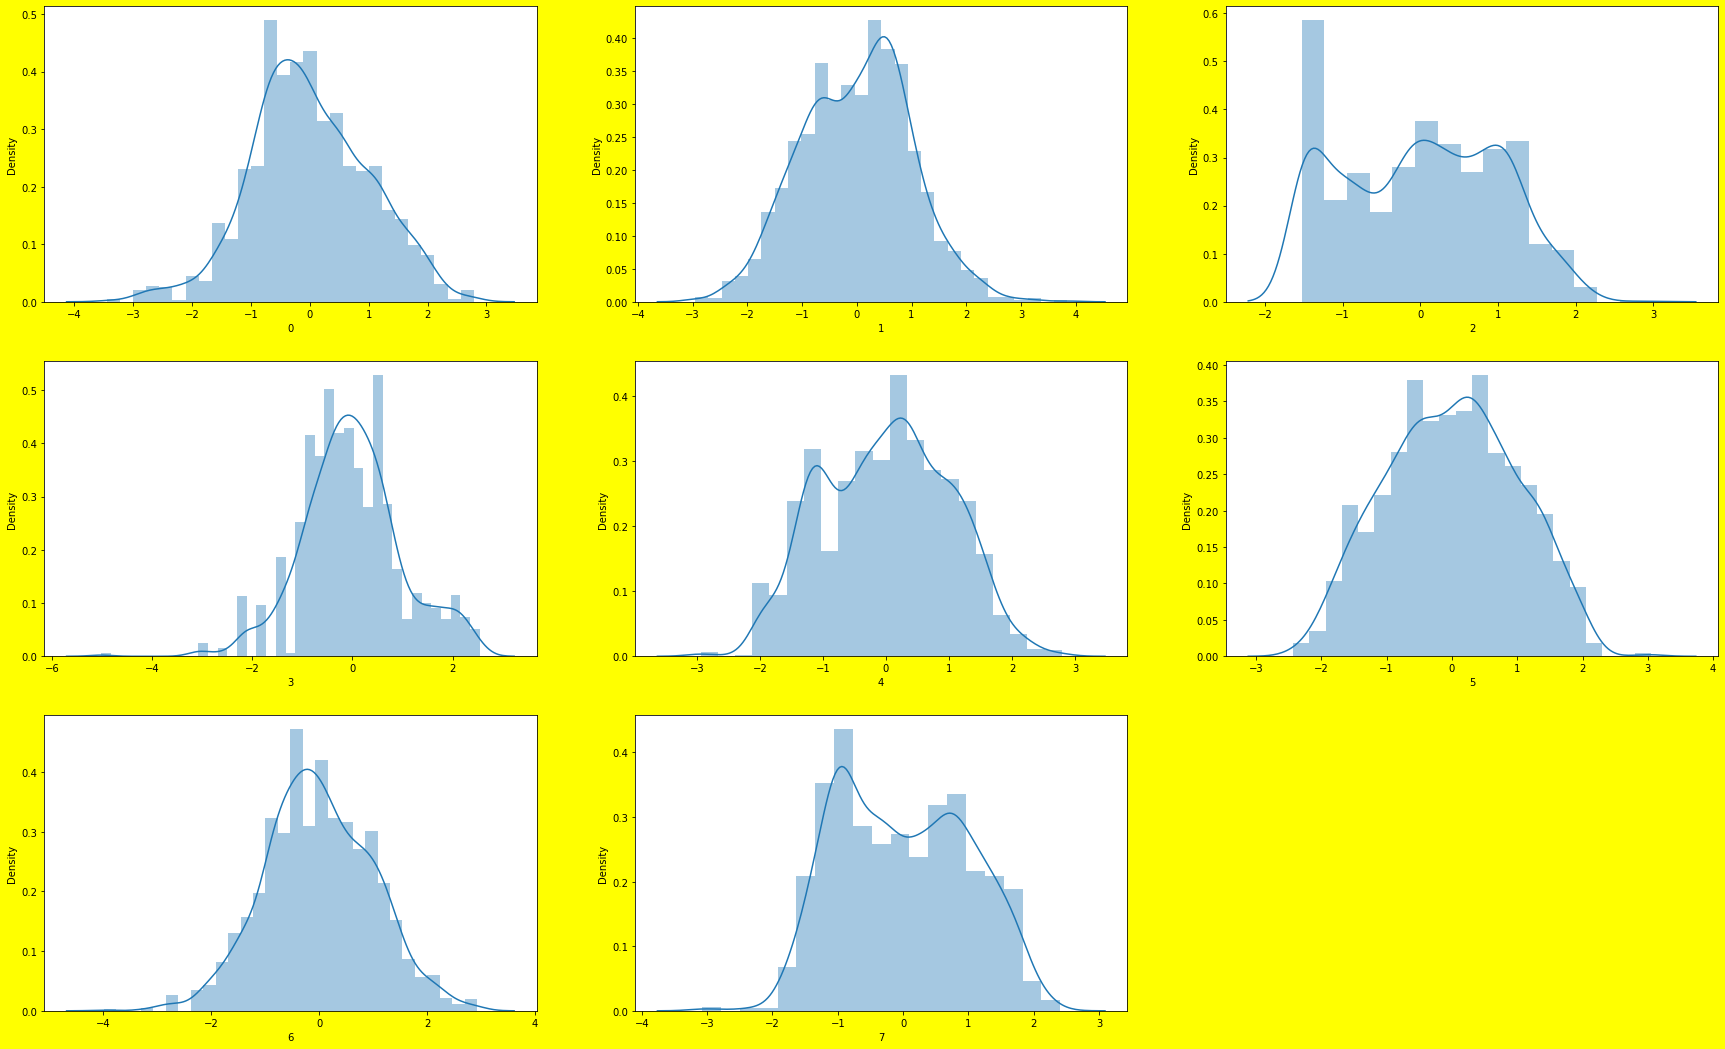

In [50]:
plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in x_scaled:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(x_scaled[column])
        plt.xlabel(column)
    plotnumber=plotnumber+1

plt.show()

 We can see that skewness is removed

## Data Standardisation

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [53]:
x_scaled=scaler.fit_transform(x)

# Training our model

## Logistic Regression Classifier

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [55]:
lr=LogisticRegression()

### Finding the best random state

In [56]:
max_acc=0
max_rs=0

for i in range(0,200):
    x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaled,y,random_state=i,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train_ns,y_train_ns)
    pred_rf=lr.predict(x_test)
    accuracy=accuracy_score(y_test,pred_rf)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.896875 random state 0
max_accuracy 0.896875 max_random_state 0
Testing accuracy 0.88125 random state 1
Testing accuracy 0.8875 random state 2
Testing accuracy 0.909375 random state 3
max_accuracy 0.909375 max_random_state 3
Testing accuracy 0.875 random state 4
Testing accuracy 0.86875 random state 5
Testing accuracy 0.909375 random state 6
Testing accuracy 0.884375 random state 7
Testing accuracy 0.884375 random state 8
Testing accuracy 0.90625 random state 9
Testing accuracy 0.878125 random state 10
Testing accuracy 0.871875 random state 11
Testing accuracy 0.871875 random state 12
Testing accuracy 0.871875 random state 13
Testing accuracy 0.878125 random state 14
Testing accuracy 0.884375 random state 15
Testing accuracy 0.90625 random state 16
Testing accuracy 0.9 random state 17
Testing accuracy 0.896875 random state 18
Testing accuracy 0.859375 random state 19
Testing accuracy 0.871875 random state 20
Testing accuracy 0.890625 random state 21
Testing accuracy 0

We found that max_accuracy is 0.91875 at max_random_state= 92


In [57]:
x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaled,y,random_state=92,test_size=0.20)


In [58]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [59]:
lr=LogisticRegression()

In [60]:
lr.fit(x_train_ns,y_train_ns)

LogisticRegression()

In [62]:
metric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:87.646599%


In [63]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:91.875000%
Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       287
           1       0.68      0.39      0.50        33

    accuracy                           0.92       320
   macro avg       0.81      0.69      0.73       320
weighted avg       0.91      0.92      0.91       320



### Finding best Cross validation score for logistic regression:

In [64]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 86.24037859824782

cv at  3
Cross validation score is :- 87.99249530956847

cv at  4
Cross validation score is :- 87.4923245614035

cv at  5
Cross validation score is :- 87.4294670846395

cv at  6
Cross validation score is :- 87.30510733763246

cv at  7
Cross validation score is :- 87.5570476409364

cv at  8
Cross validation score is :- 87.3674623115578

cv at  9
Cross validation score is :- 87.55580947544384



 We found that min difference between testing accuracy and cross val score at cv=3

In [65]:
lssscore_selected=cross_val_score(lr,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8799249530956846


There we found that at cv=3 and random state =92 we have testing accuracy =91.87 and cross_val score=87.99

# Hyperparameter Tuning using Grid search cv

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'penalty':['l1','l2','elesticnet','none'],
           'solver':['lbfgs','newton-cg','liblinear','sag'],
           'max_iter':[100,1000,2500]}

In [68]:
grid_srch=GridSearchCV(estimator=lr,param_grid=param_grid)

In [69]:
grid_srch.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elesticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag']})

In [70]:
print('best_parameters',grid_srch.best_params_)

best_parameters {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [71]:
lr=grid_srch.best_estimator_

In [74]:
metric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:87.568413%


In [75]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:91.875000%
Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       287
           1       0.68      0.39      0.50        33

    accuracy                           0.92       320
   macro avg       0.81      0.69      0.73       320
weighted avg       0.91      0.92      0.91       320



### Cross validation score

In [76]:
lssscore_selected=cross_val_score(lr,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8780487804878049


# Conclusion(Logistic Regression)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier()

In [79]:
rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [80]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:100.000000%


In [81]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:93.750000%
Classification report
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       287
           1       0.78      0.55      0.64        33

    accuracy                           0.94       320
   macro avg       0.87      0.76      0.80       320
weighted avg       0.93      0.94      0.93       320



In [82]:
lssscore_selected=cross_val_score(rf,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8786741713570981


### Hyperparameter Tuning

In [83]:
params={'n_estimators':[10,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,20],
       'min_samples_split':[6,7,8]}

In [84]:
grd=GridSearchCV(estimator=rf,param_grid=params)

In [85]:
grd.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20], 'min_samples_split': [6, 7, 8],
                         'n_estimators': [10, 15]})

In [86]:
rf=grd.best_estimator_

In [87]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:97.732604%


In [88]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:93.125000%
Classification report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       287
           1       0.70      0.58      0.63        33

    accuracy                           0.93       320
   macro avg       0.83      0.77      0.80       320
weighted avg       0.93      0.93      0.93       320



In [89]:
lssscore_selected=cross_val_score(rf,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8717948717948718


## Conclusion( Random Forest)

# Using Gradient Boosting Trees

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbt=GradientBoostingClassifier()

In [92]:
gbt.fit(x_train_ns,y_train_ns)

GradientBoostingClassifier()

In [93]:
metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:95.699765%


In [94]:
metric_score(gbt,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:92.812500%
Classification report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       287
           1       0.68      0.58      0.62        33

    accuracy                           0.93       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.92      0.93      0.93       320



In [95]:
lssscore_selected=cross_val_score(gbt,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8649155722326455


## Hyperparameter Tuning

In [96]:
params={'max_depth':[1,2,3,4],
       'learning_rate':[.2,.3,.4],
       'min_samples_split':[2,3,4,5]}

In [97]:
grd=GridSearchCV(estimator=gbt,param_grid=params)

In [98]:
grd.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [99]:
rf=grd.best_estimator_

In [100]:
metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:95.699765%


In [127]:
metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:92.812500%
Classification report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       287
           1       0.68      0.58      0.62        33

    accuracy                           0.93       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.92      0.93      0.93       320



In [102]:
lssscore_selected=cross_val_score(gbt,x,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8649155722326455


## Conclusion( GradientBoosting Trees)

# Using KNN Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn=KNeighborsClassifier()

In [105]:
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier()

In [106]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:91.321345%


In [107]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in testing:90.000000%
Classification report
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       287
           1       0.52      0.45      0.48        33

    accuracy                           0.90       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.89      0.90      0.90       320



In [108]:
lssscore_selected=cross_val_score(knn,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8630393996247654


## Hyperparameter Tuning

In [112]:
params={'algorithm':['kd_tree','brute'],
       'leaf_size':[3,5,6,7,8],
       'n_neighbors':[3,5,7,9]}

In [113]:
grd=GridSearchCV(estimator=knn,param_grid=params)

In [114]:
grd.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9]})

In [115]:
rf=grd.best_estimator_

In [116]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:91.321345%


In [123]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:90.000000%
Classification report
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       287
           1       0.52      0.45      0.48        33

    accuracy                           0.90       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.89      0.90      0.90       320



In [124]:
lssscore_selected=cross_val_score(knn,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8630393996247654


## Conclusion(KNN)

# Plotting auc for all models


In [125]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


Text(0.5, 1.0, 'Recieving operating characterstics')

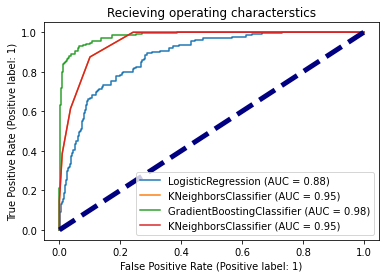

In [126]:
disp=plot_roc_curve(lr,x_train_ns,y_train_ns)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(gbt,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rf,x_train_ns,y_train_ns,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


# Final Conclusion

So we can say that Gradient Boosting Trees is best model as it has highest area under curve